In [1]:
from functions import utils_plot
from functions import utils_get
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Read MOER data

In [2]:
moer_df = pd.read_csv("./moer/moer_15.csv")
moer_df.head()

,datetime,value,moer
0,2023-01-01 00:00:00+00:00,997.000000,452.638000
1,2023-01-01 00:15:00+00:00,995.000000,451.730000
2,2023-01-01 00:30:00+00:00,995.333333,451.881333
3,2023-01-01 00:45:00+00:00,995.333333,451.881333
4,2023-01-01 01:00:00+00:00,987.000000,448.098000


In [3]:
moer_df['datetime'] = pd.to_datetime(moer_df['datetime'])
moer_df['datetime'] = moer_df['datetime'].dt.tz_convert('America/Los_Angeles')

/Users/aoyuzou/opt/anaconda3/lib/python3.9/site-packages/pandas/core/ops/array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  result = libops.scalar_compare(x.ravel(), y, op)
/Users/aoyuzou/Documents/Mac/ClassMaterial/ARCH299/SDH/functions/utils_plot.py:27: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([f'{y:.2f}{unit}' for y in y_ticks])


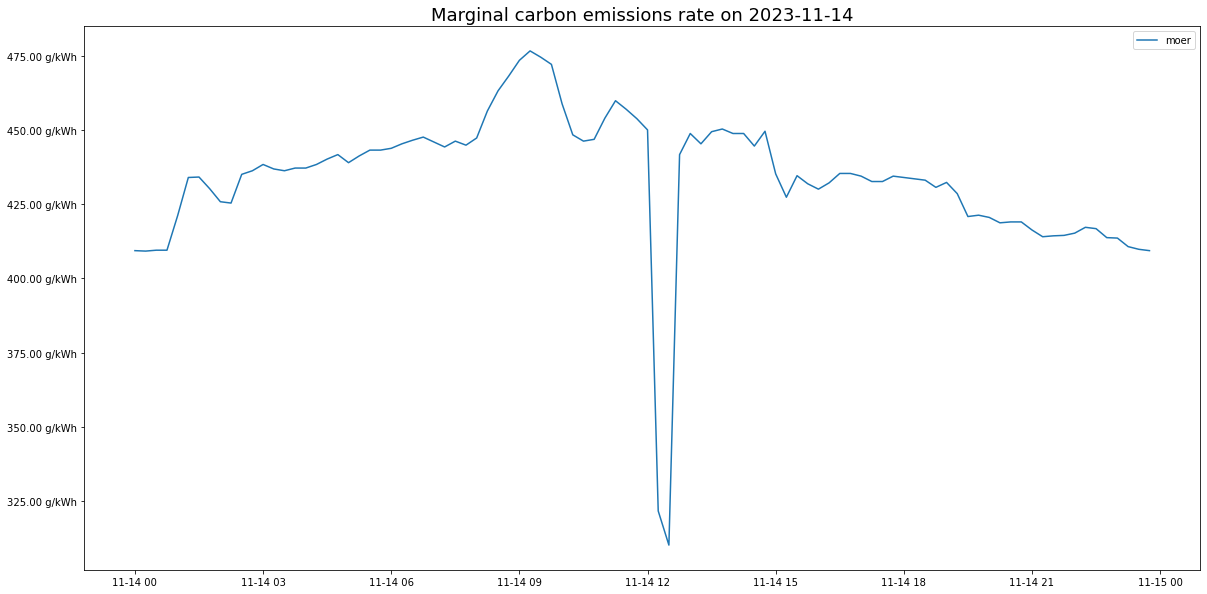

In [4]:
date = '2023-11-14'
utils_plot.make_plot(moer_df, ['moer'], date, unit=' g/kWh', plot_title='Marginal carbon emissions rate on {}'.format(date))

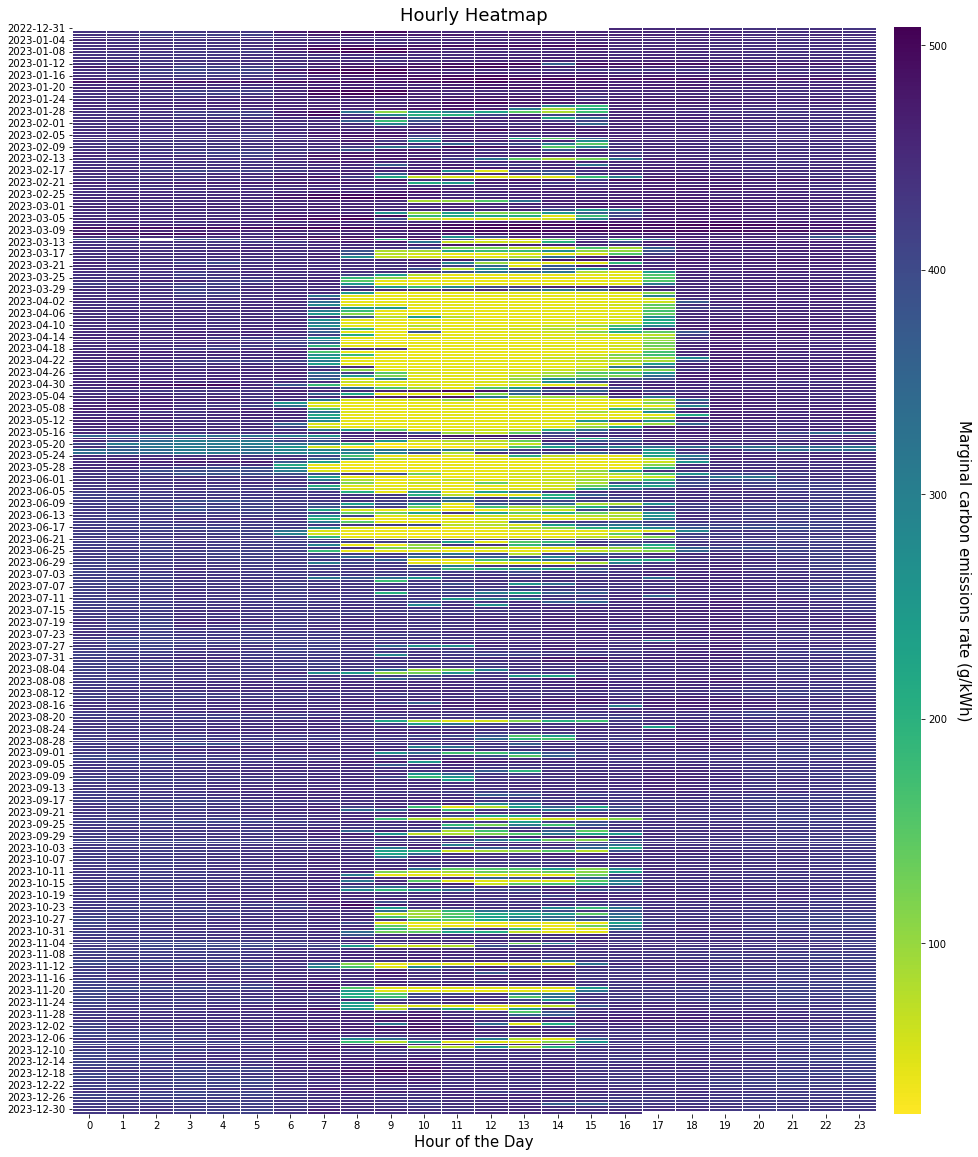

In [5]:
utils_plot.plot_hourly_heatmap(moer_df, ['moer'], "Marginal carbon emissions rate (g/kWh)")

Read power data

In [6]:
data_df = pd.read_csv("./sw/sw.csv")
data_df['datetime'] = pd.to_datetime(data_df['datetime'])
data_df['datetime'] = data_df['datetime'].dt.tz_localize('America/Los_Angeles', nonexistent='shift_forward', ambiguous=True)
data_df.head()

,datetime,SDH.SW.MSA.ATS-ES.PEAK DEMAND,SDH.SW.MSA.MS41B.PEAK DEMAND,SDH.SW.MSA.CD4RA.PWR REAL 3 P,SDH.SW.MSA.ATS-ES.PWR REAL 3 P,SDH.SW.MSB.MS41A.PEAK DEMAND,SDH.SW.MSB.ATS-EL.PEAK DEMAND,SDH.SW.MSA.MSB.TIE.PWR REAL 3P,SDH.SW.MSB.MAIN.PEAK DEMAND,SDH.SW.MSA.CD4RA.PEAK DEMAND,...,SDH.SW.MSA.CH-2.PWR REAL 3 P,SDH.SW.MSB.ATS-E02.REAL 3 PH,SDH.SW.MSA.MDC.PEAK DEMAND,SDH.SW.MSA.ATS-E1.PEAK DEMAND,SDH.SW.MSA.MS41B.PWR REAL 3 P,SDH.SW.MSA.MS41A.PEAK DEMAND,SDH.SW.MSB.ATS-E02.PEAK DEMAND,SDH.SW.MSA.CD41A.PWR REAL 3 P,SDH.SW.MSB.MS41A.PWR REAL 3 P,SDH.SW.MSB.MAIN.PWR REAL 3 P
0,2023-01-20 15:45:00-08:00,78999.0,0.0,24999.0,16999.0,0.0,109999.0,0.0,408999.0,100999.0,...,71999.0,30999.0,39999.0,178999.0,0.0,407999.0,33999.0,29999.0,0.0,379999.0
1,2023-01-20 16:00:00-08:00,78999.0,0.0,26999.0,17999.0,0.0,109999.0,0.0,408999.0,100999.0,...,73999.0,30999.0,39999.0,178999.0,0.0,407999.0,33999.0,32999.0,0.0,367999.0
2,2023-01-20 16:15:00-08:00,78999.0,0.0,24999.0,17499.0,0.0,109999.0,0.0,408999.0,100999.0,...,70999.0,27999.0,39999.0,178999.0,0.0,407999.0,33999.0,25999.0,0.0,363499.0
3,2023-01-20 16:30:00-08:00,78999.0,0.0,23999.0,16999.0,0.0,109999.0,0.0,408999.0,100999.0,...,73999.0,24999.0,39999.0,178999.0,0.0,407999.0,33999.0,27999.0,0.0,368999.0
4,2023-01-20 16:45:00-08:00,78999.0,0.0,23999.0,17999.0,0.0,109999.0,0.0,408999.0,100999.0,...,68999.0,30999.0,39999.0,178999.0,0.0,407999.0,33999.0,29999.0,0.0,366499.0


In [7]:
power_df = utils_get.get_power(df=data_df, unit="W")
power_df.head()

/Users/aoyuzou/opt/anaconda3/lib/python3.9/site-packages/pandas/core/indexing.py:1851: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, val, pi)


,datetime,SDH.SW.MSA.CD4RA.PWR REAL 3 P,SDH.SW.MSA.ATS-ES.PWR REAL 3 P,SDH.SW.MSA.MSB.TIE.PWR REAL 3P,SDH.SW.MSA.MS41A.PWR REAL 3 P,SDH.SW.MSA.MDC.PWR REAL 3 P,SDH.SW.MSA.ATS-E2.PWR REAL 3 P,SDH.SW.MSB.MS41B.PWR REAL 3 P,SDH.SW.MSA.MAIN.PWR REAL 3 P,SDH.SW.MSA.MSB.PWR REAL 3 P,SDH.SW.MSB.ATS-EL.PWR REAL 3 P,SDH.SW.MSA.ATS-E1.PWR REAL 3 P,SDH.SW.MSB.CB4A.PWR REAL 3 P,SDH.SW.MSA.CH-2.PWR REAL 3 P,SDH.SW.MSA.MS41B.PWR REAL 3 P,SDH.SW.MSA.CD41A.PWR REAL 3 P,SDH.SW.MSB.MS41A.PWR REAL 3 P,SDH.SW.MSB.MAIN.PWR REAL 3 P
0,2023-01-20 15:45:00-08:00,24.999,16.999,0.0,331.999,22.999,30.999,179.999,537.999,0.0,93.999,59.999,55.999,71.999,0.0,29.999,0.0,379.999
1,2023-01-20 16:00:00-08:00,26.999,17.999,0.0,330.999,23.999,30.999,177.999,539.999,0.0,95.999,58.999,55.999,73.999,0.0,32.999,0.0,367.999
2,2023-01-20 16:15:00-08:00,24.999,17.499,0.0,334.499,24.499,27.999,175.499,546.999,0.0,102.999,69.999,57.999,70.999,0.0,25.999,0.0,363.499
3,2023-01-20 16:30:00-08:00,23.999,16.999,0.0,319.999,23.999,24.999,186.999,535.999,0.0,94.999,59.999,55.999,73.999,0.0,27.999,0.0,368.999
4,2023-01-20 16:45:00-08:00,23.999,17.999,0.0,325.999,23.499,30.999,160.999,542.499,0.0,99.999,60.999,54.999,68.999,0.0,29.999,0.0,366.499


In [8]:
columns = ['SDH.SW.MSA.MAIN.PWR REAL 3 P']

/Users/aoyuzou/Documents/Mac/ClassMaterial/ARCH299/SDH/functions/utils_plot.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['datetime'] = pd.to_datetime(df.iloc[:, 0])
/Users/aoyuzou/Documents/Mac/ClassMaterial/ARCH299/SDH/functions/utils_plot.py:27: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([f'{y:.2f}{unit}' for y in y_ticks])


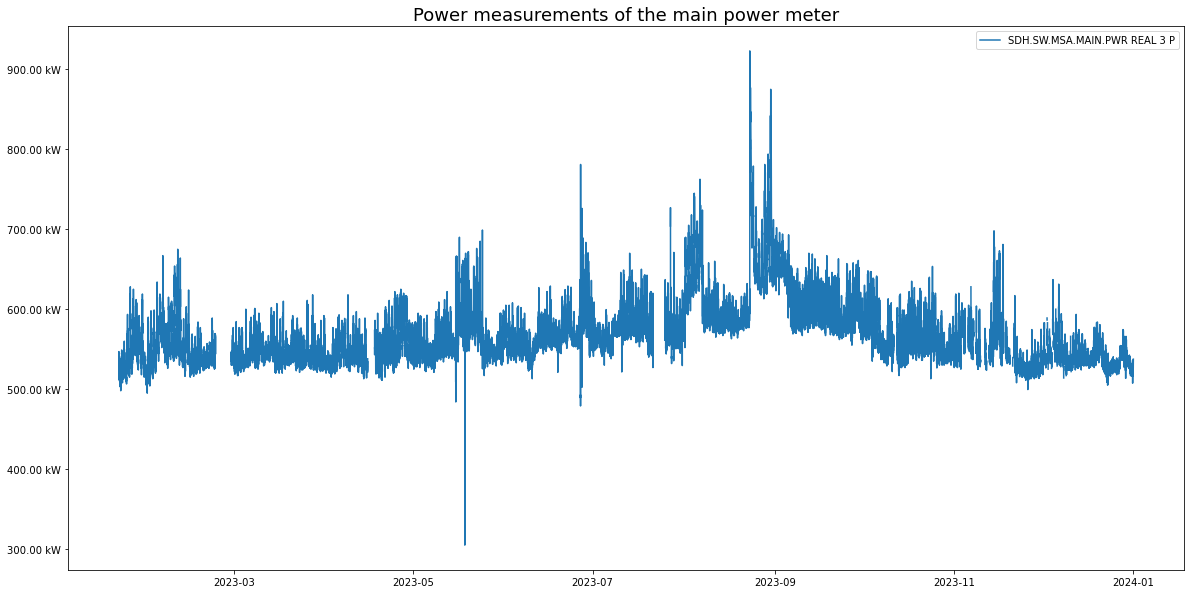

In [9]:
utils_plot.make_plot(power_df, columns, unit=' kW', plot_title='Power measurements of the main power meter')

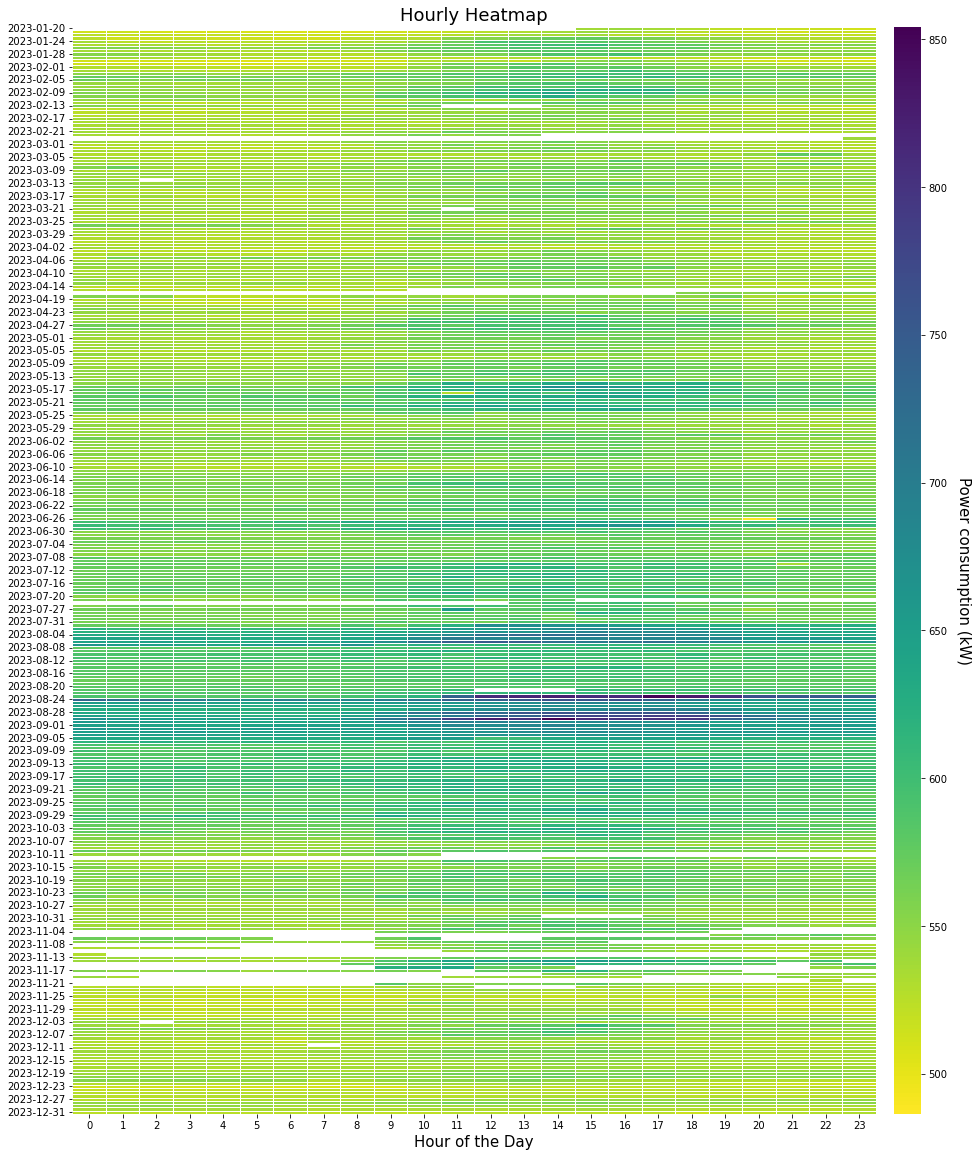

In [10]:
utils_plot.plot_hourly_heatmap(power_df, columns, 'Power consumption (kW)')

Get emissions data

In [11]:
df_temp = pd.merge(power_df, moer_df, on = 'datetime', how = 'outer')
df_temp.head()

,datetime,SDH.SW.MSA.CD4RA.PWR REAL 3 P,SDH.SW.MSA.ATS-ES.PWR REAL 3 P,SDH.SW.MSA.MSB.TIE.PWR REAL 3P,SDH.SW.MSA.MS41A.PWR REAL 3 P,SDH.SW.MSA.MDC.PWR REAL 3 P,SDH.SW.MSA.ATS-E2.PWR REAL 3 P,SDH.SW.MSB.MS41B.PWR REAL 3 P,SDH.SW.MSA.MAIN.PWR REAL 3 P,SDH.SW.MSA.MSB.PWR REAL 3 P,SDH.SW.MSB.ATS-EL.PWR REAL 3 P,SDH.SW.MSA.ATS-E1.PWR REAL 3 P,SDH.SW.MSB.CB4A.PWR REAL 3 P,SDH.SW.MSA.CH-2.PWR REAL 3 P,SDH.SW.MSA.MS41B.PWR REAL 3 P,SDH.SW.MSA.CD41A.PWR REAL 3 P,SDH.SW.MSB.MS41A.PWR REAL 3 P,SDH.SW.MSB.MAIN.PWR REAL 3 P,value,moer
0,2023-01-20 15:45:00-08:00,24.999,16.999,0.0,331.999,22.999,30.999,179.999,537.999,0.0,93.999,59.999,55.999,71.999,0.0,29.999,0.0,379.999,1044.000000,473.976000
1,2023-01-20 16:00:00-08:00,26.999,17.999,0.0,330.999,23.999,30.999,177.999,539.999,0.0,95.999,58.999,55.999,73.999,0.0,32.999,0.0,367.999,1007.666667,457.480667
2,2023-01-20 16:15:00-08:00,24.999,17.499,0.0,334.499,24.499,27.999,175.499,546.999,0.0,102.999,69.999,57.999,70.999,0.0,25.999,0.0,363.499,1000.333333,454.151333
3,2023-01-20 16:30:00-08:00,23.999,16.999,0.0,319.999,23.999,24.999,186.999,535.999,0.0,94.999,59.999,55.999,73.999,0.0,27.999,0.0,368.999,998.000000,453.092000
4,2023-01-20 16:45:00-08:00,23.999,17.999,0.0,325.999,23.499,30.999,160.999,542.499,0.0,99.999,60.999,54.999,68.999,0.0,29.999,0.0,366.499,998.333333,453.243333


In [12]:
df_emissions = df_temp.copy()

# Multiply all columns except the first and last by the last column
df_emissions.iloc[:, 1:-1] = df_emissions.iloc[:, 1:-1].multiply(df_emissions.iloc[:, -1], axis="index") / 1000
df_emissions = df_emissions.drop(columns=['value', 'moer'])
# Now 'new_df' is the new DataFrame with the desired calculations

df_emissions.head()


,datetime,SDH.SW.MSA.CD4RA.PWR REAL 3 P,SDH.SW.MSA.ATS-ES.PWR REAL 3 P,SDH.SW.MSA.MSB.TIE.PWR REAL 3P,SDH.SW.MSA.MS41A.PWR REAL 3 P,SDH.SW.MSA.MDC.PWR REAL 3 P,SDH.SW.MSA.ATS-E2.PWR REAL 3 P,SDH.SW.MSB.MS41B.PWR REAL 3 P,SDH.SW.MSA.MAIN.PWR REAL 3 P,SDH.SW.MSA.MSB.PWR REAL 3 P,SDH.SW.MSB.ATS-EL.PWR REAL 3 P,SDH.SW.MSA.ATS-E1.PWR REAL 3 P,SDH.SW.MSB.CB4A.PWR REAL 3 P,SDH.SW.MSA.CH-2.PWR REAL 3 P,SDH.SW.MSA.MS41B.PWR REAL 3 P,SDH.SW.MSA.CD41A.PWR REAL 3 P,SDH.SW.MSB.MS41A.PWR REAL 3 P,SDH.SW.MSB.MAIN.PWR REAL 3 P
0,2023-01-20 15:45:00-08:00,11.848926,8.057118,0.0,157.359558,10.900974,14.692782,85.315206,254.998614,0.0,44.553270,28.438086,26.542182,34.125798,0.0,14.218806,0.0,180.110406
1,2023-01-20 16:00:00-08:00,12.351521,8.234195,0.0,151.425643,10.979079,14.181443,81.431101,247.039103,0.0,43.917687,26.990902,25.618460,33.853112,0.0,15.096405,0.0,168.352428
2,2023-01-20 16:15:00-08:00,11.353329,7.947194,0.0,151.913167,11.126254,12.715783,79.703105,248.420325,0.0,46.777133,31.790139,26.340323,32.244291,0.0,11.807481,0.0,165.083556
3,2023-01-20 16:30:00-08:00,10.873755,7.702111,0.0,144.988987,10.873755,11.326847,84.727751,242.856859,0.0,43.043287,27.185067,25.372699,33.528355,0.0,12.686123,0.0,167.190495
4,2023-01-20 16:45:00-08:00,10.877387,8.157927,0.0,147.756873,10.650765,14.050090,72.971723,245.884055,0.0,45.323880,27.647390,24.927930,31.273337,0.0,13.596847,0.0,166.113228


/Users/aoyuzou/opt/anaconda3/lib/python3.9/site-packages/pandas/core/ops/array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  result = libops.scalar_compare(x.ravel(), y, op)
/Users/aoyuzou/Documents/Mac/ClassMaterial/ARCH299/SDH/functions/utils_plot.py:27: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([f'{y:.2f}{unit}' for y in y_ticks])


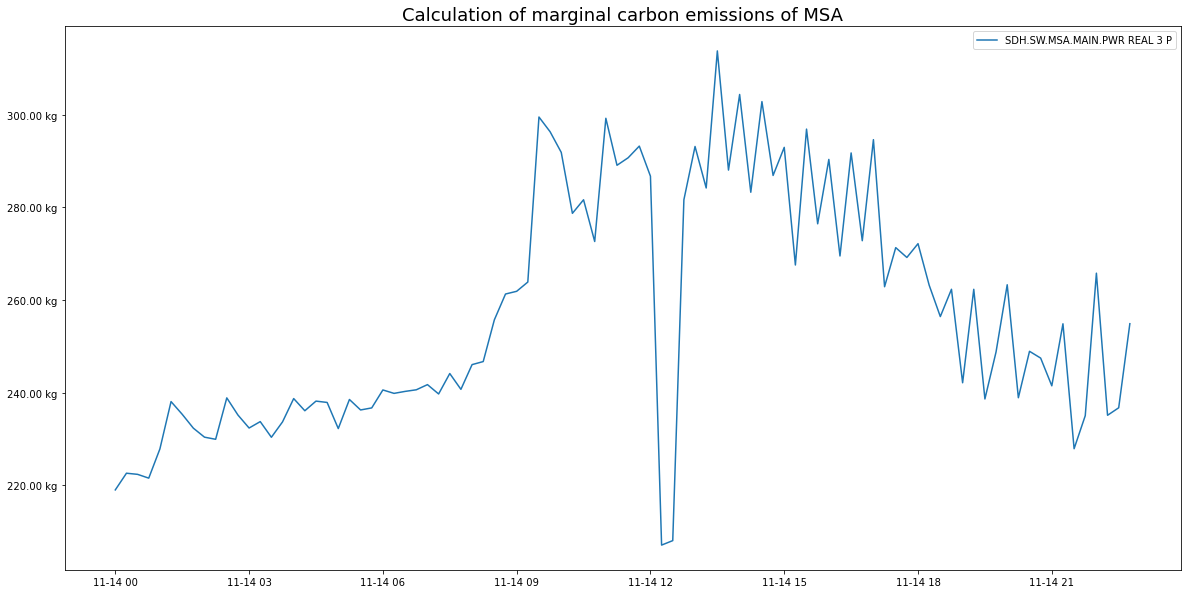

In [13]:
utils_plot.make_plot(df_emissions, columns, date, ' kg', 'Calculation of marginal carbon emissions of MSA')

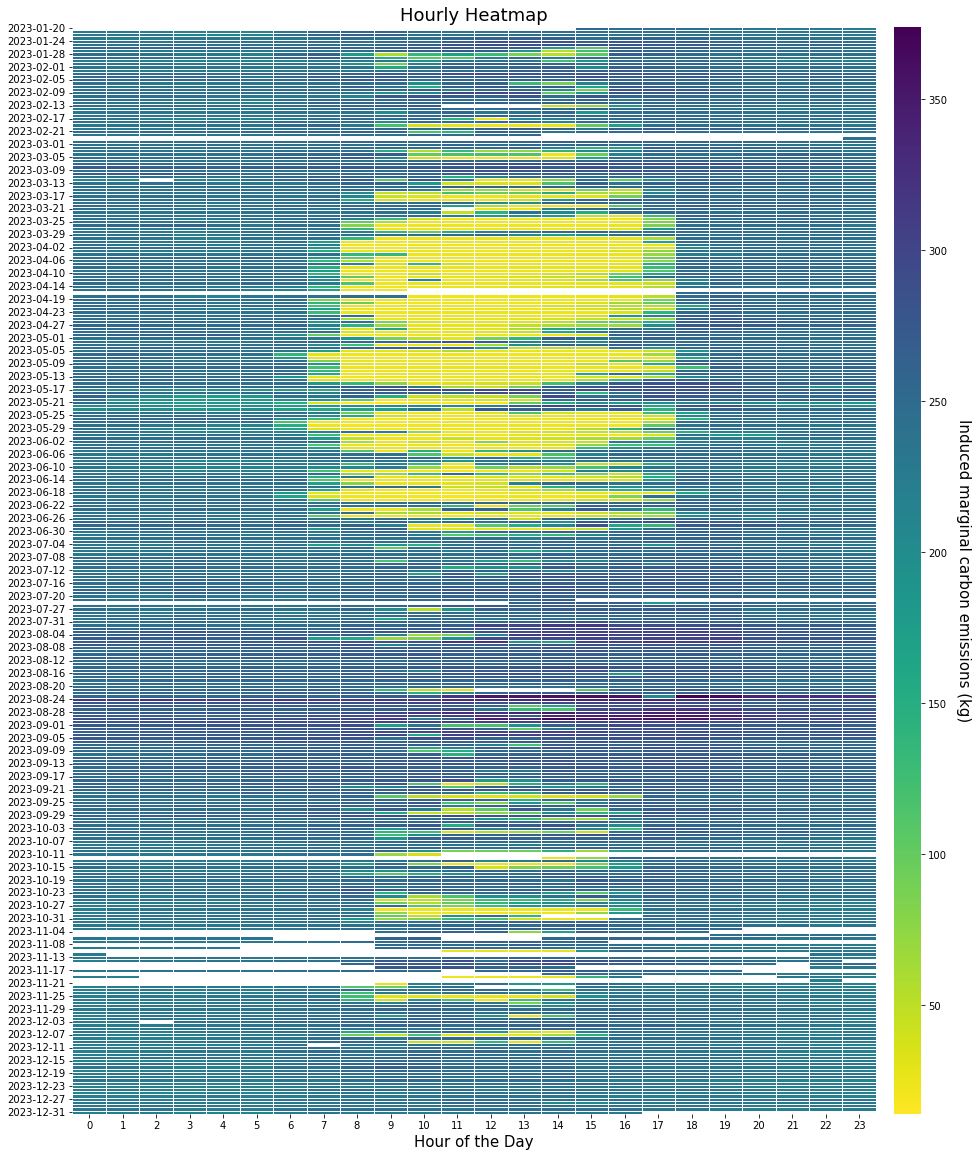

In [14]:
utils_plot.plot_hourly_heatmap(df_emissions, columns, 'Induced marginal carbon emissions (kg)')

/Users/aoyuzou/Documents/Mac/ClassMaterial/ARCH299/SDH/functions/utils_plot.py:96: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([f'{y:.2f}{unit}' for y in y_ticks])


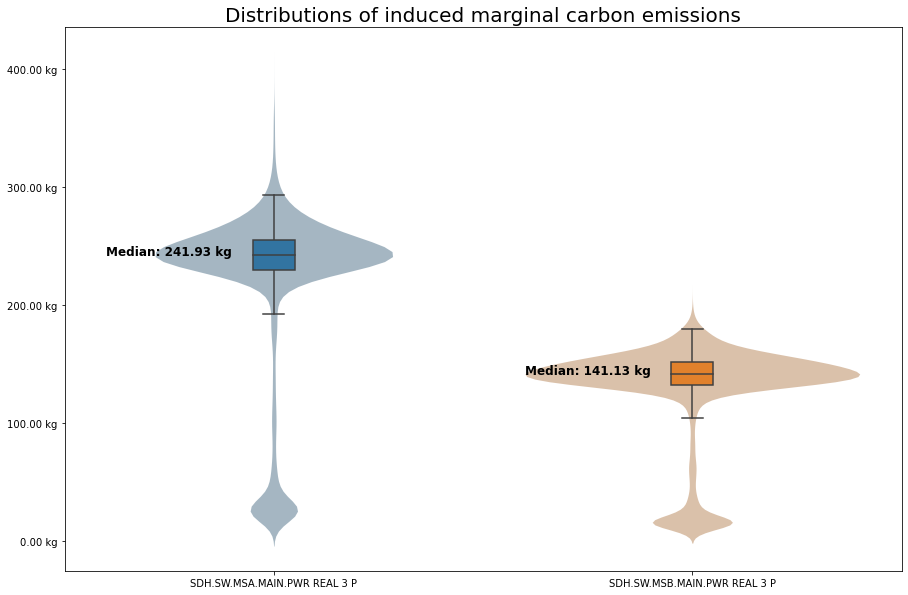

In [15]:
utils_plot.create_violin_plot(df_emissions, ['SDH.SW.MSA.MAIN.PWR REAL 3 P', 'SDH.SW.MSB.MAIN.PWR REAL 3 P'], ' kg', 'Distributions of induced marginal carbon emissions')

Read climate data

In [16]:
df_climate = pd.read_csv("./climate/climate.csv")
df_climate['datetime'] = pd.to_datetime(df_climate['datetime'])
df_climate['datetime'] = df_climate['datetime'].dt.tz_localize('America/Los_Angeles', nonexistent='shift_forward', ambiguous=True)
df_climate.head()

,datetime,air_temp,dni,ghi,t_out,rh_out,wind_s,lat,long,time_zone
0,2023-01-01 00:00:00-08:00,10.0,0.0,0.0,11.5,NaN,3.1,37.871666,-122.272781,America/Los_Angeles
1,2023-01-01 00:15:00-08:00,10.0,0.0,0.0,11.5,NaN,3.1,37.871666,-122.272781,America/Los_Angeles
2,2023-01-01 00:30:00-08:00,10.0,0.0,0.0,11.5,NaN,3.1,37.871666,-122.272781,America/Los_Angeles
3,2023-01-01 00:45:00-08:00,10.0,0.0,0.0,11.5,NaN,3.1,37.871666,-122.272781,America/Los_Angeles
4,2023-01-01 01:00:00-08:00,10.0,0.0,0.0,10.9,NaN,3.1,37.871666,-122.272781,America/Los_Angeles


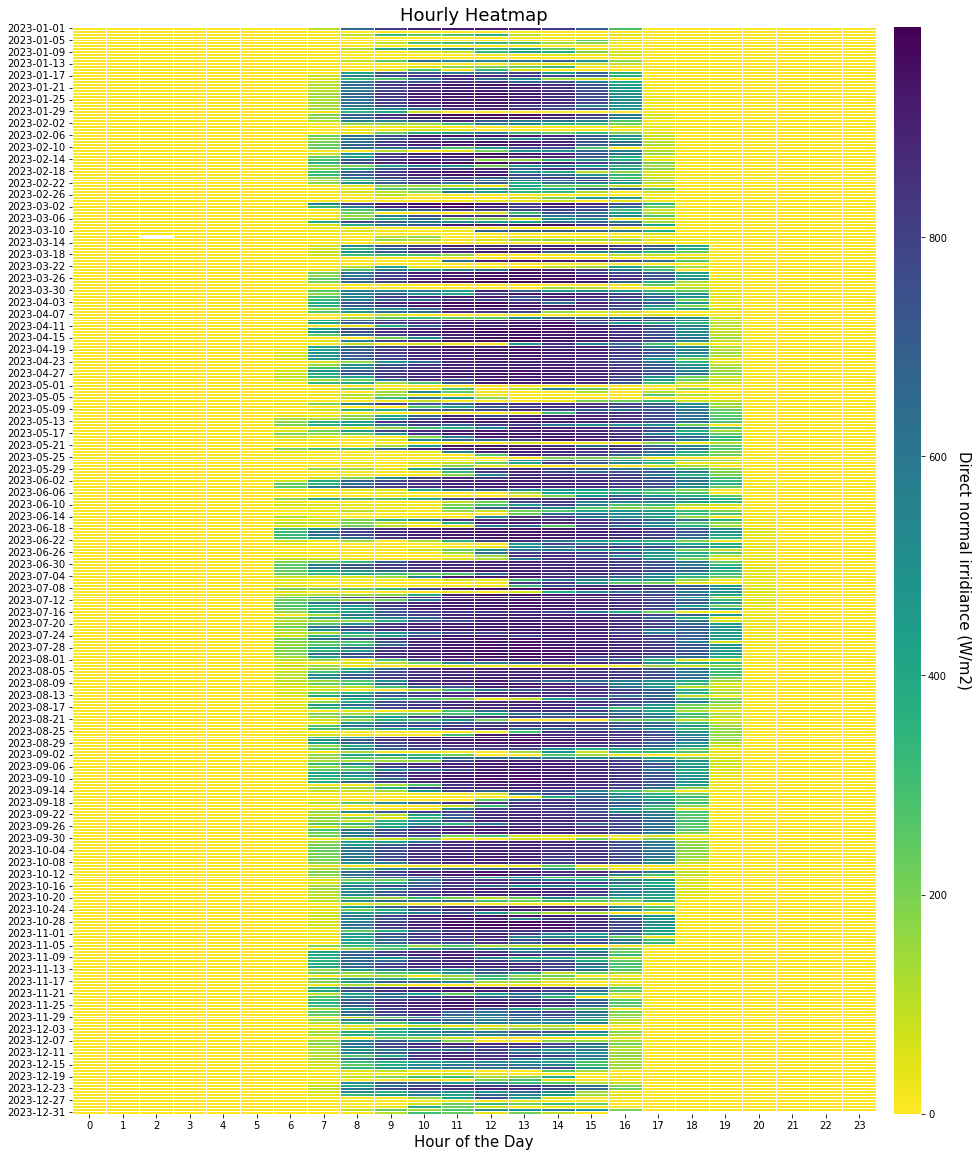

In [17]:
utils_plot.plot_hourly_heatmap(df_climate, ['dni'], "Direct normal irridiance (W/m2)")

Get overall dataframe

In [18]:
df_all = pd.merge(df_emissions, df_climate, on = 'datetime', how = 'outer')
df_all.head()

,datetime,SDH.SW.MSA.CD4RA.PWR REAL 3 P,SDH.SW.MSA.ATS-ES.PWR REAL 3 P,SDH.SW.MSA.MSB.TIE.PWR REAL 3P,SDH.SW.MSA.MS41A.PWR REAL 3 P,SDH.SW.MSA.MDC.PWR REAL 3 P,SDH.SW.MSA.ATS-E2.PWR REAL 3 P,SDH.SW.MSB.MS41B.PWR REAL 3 P,SDH.SW.MSA.MAIN.PWR REAL 3 P,SDH.SW.MSA.MSB.PWR REAL 3 P,...,SDH.SW.MSB.MAIN.PWR REAL 3 P,air_temp,dni,ghi,t_out,rh_out,wind_s,lat,long,time_zone
0,2023-01-20 15:45:00-08:00,11.848926,8.057118,0.0,157.359558,10.900974,14.692782,85.315206,254.998614,0.0,...,180.110406,13.0,680.0,207.0,13.2,NaN,1.5,37.871666,-122.272781,America/Los_Angeles
1,2023-01-20 16:00:00-08:00,12.351521,8.234195,0.0,151.425643,10.979079,14.181443,81.431101,247.039103,0.0,...,168.352428,13.0,622.0,164.0,12.8,NaN,3.1,37.871666,-122.272781,America/Los_Angeles
2,2023-01-20 16:15:00-08:00,11.353329,7.947194,0.0,151.913167,11.126254,12.715783,79.703105,248.420325,0.0,...,165.083556,12.0,545.0,121.0,12.8,NaN,3.1,37.871666,-122.272781,America/Los_Angeles
3,2023-01-20 16:30:00-08:00,10.873755,7.702111,0.0,144.988987,10.873755,11.326847,84.727751,242.856859,0.0,...,167.190495,12.0,445.0,79.0,12.8,NaN,3.1,37.871666,-122.272781,America/Los_Angeles
4,2023-01-20 16:45:00-08:00,10.877387,8.157927,0.0,147.756873,10.650765,14.050090,72.971723,245.884055,0.0,...,166.113228,12.0,225.0,40.0,12.8,NaN,3.1,37.871666,-122.272781,America/Los_Angeles


Hourly average scatter plot

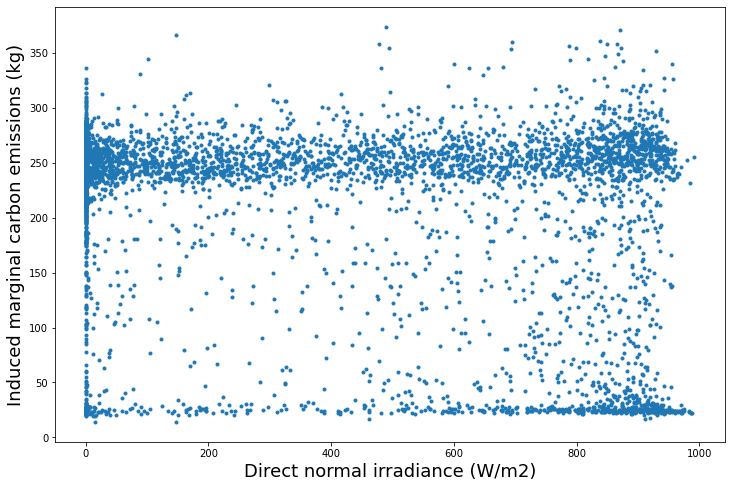

In [19]:
df_hourly = df_all.set_index('datetime')
df_hourly = df_hourly.resample('1H').mean()
df_hourly.reset_index(inplace=True)
plt.figure(figsize=[12, 8])
plt.plot(df_hourly['dni'], df_hourly['SDH.SW.MSA.MAIN.PWR REAL 3 P'], '.')
plt.xlabel('Direct normal irradiance (W/m2)', fontsize = 18)
plt.ylabel('Induced marginal carbon emissions (kg)', fontsize = 18)
plt.show()

Occupied hours

In [20]:
df_hourly_occ = df_hourly[(df_hourly['datetime'].dt.hour >= 7) & (df_hourly['datetime'].dt.hour <= 18)]

Time window: April - July

In [21]:
df_AJ = df_hourly_occ[(df_hourly_occ['datetime'].dt.month >= 3) & (df_hourly_occ['datetime'].dt.month <= 7)]
df_AJ = df_AJ[['SDH.SW.MSA.MAIN.PWR REAL 3 P', 'air_temp', 't_out', 'dni', 'ghi']]

/Users/aoyuzou/Documents/Mac/ClassMaterial/ARCH299/SDH/functions/utils_plot.py:96: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([f'{y:.2f}{unit}' for y in y_ticks])


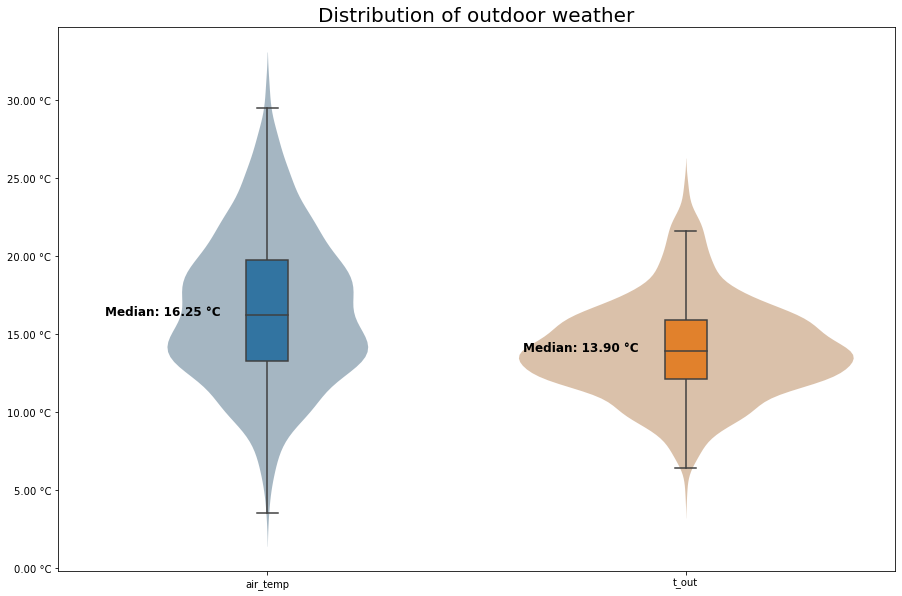

In [22]:
utils_plot.create_violin_plot(df_AJ, ['air_temp', 't_out'], ' °C', 'Distribution of outdoor weather')

/Users/aoyuzou/Documents/Mac/ClassMaterial/ARCH299/SDH/functions/utils_plot.py:96: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([f'{y:.2f}{unit}' for y in y_ticks])


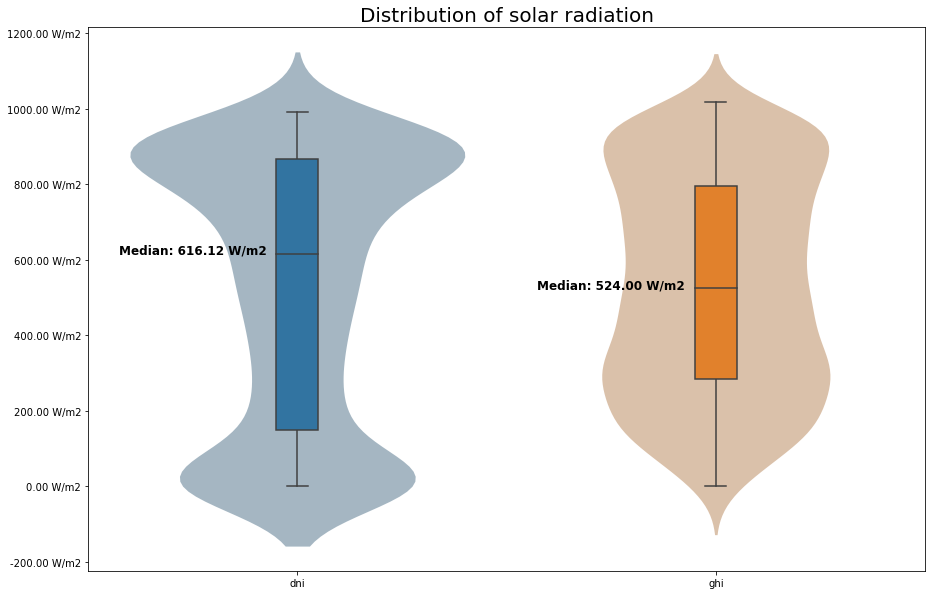

In [23]:
utils_plot.create_violin_plot(df_AJ, ['dni', 'ghi'], ' W/m2', 'Distribution of solar radiation')

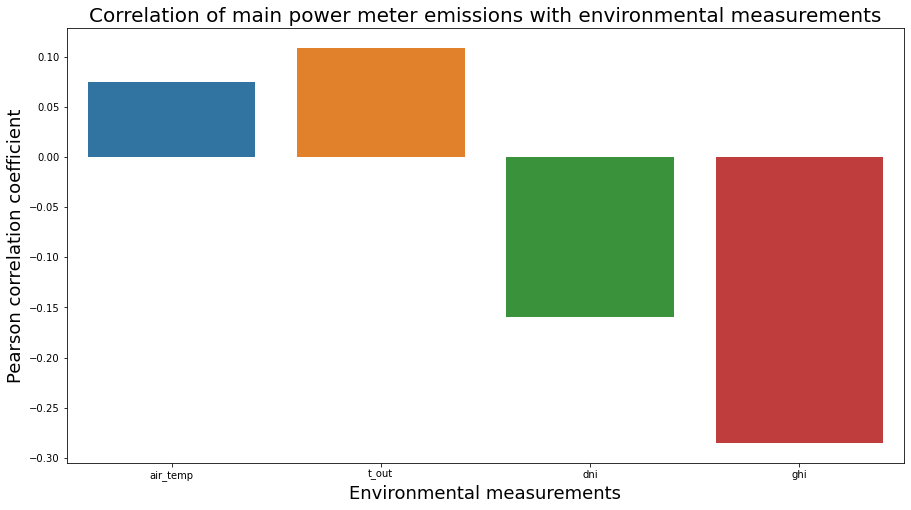

In [24]:
correlation_matrix = df_AJ.corr()
correlation_with_emissions = correlation_matrix['SDH.SW.MSA.MAIN.PWR REAL 3 P'].drop('SDH.SW.MSA.MAIN.PWR REAL 3 P')  # Drop self-correlation
plt.figure(figsize=[15, 8])
sns.barplot(x=correlation_with_emissions.index, y=correlation_with_emissions.values)
plt.title('Correlation of main power meter emissions with environmental measurements', fontsize = 20)
plt.xlabel('Environmental measurements', fontsize = 18)
plt.ylabel('Pearson correlation coefficient', fontsize = 18)
plt.show()

Time window: August - October

In [29]:
df_AO = df_hourly_occ[(df_hourly_occ['datetime'].dt.month >= 8) & (df_hourly_occ['datetime'].dt.month <= 9)]
df_AO = df_AO[['SDH.SW.MSA.MAIN.PWR REAL 3 P', 'air_temp', 't_out', 'dni', 'ghi']]

/Users/aoyuzou/Documents/Mac/ClassMaterial/ARCH299/SDH/functions/utils_plot.py:96: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([f'{y:.2f}{unit}' for y in y_ticks])


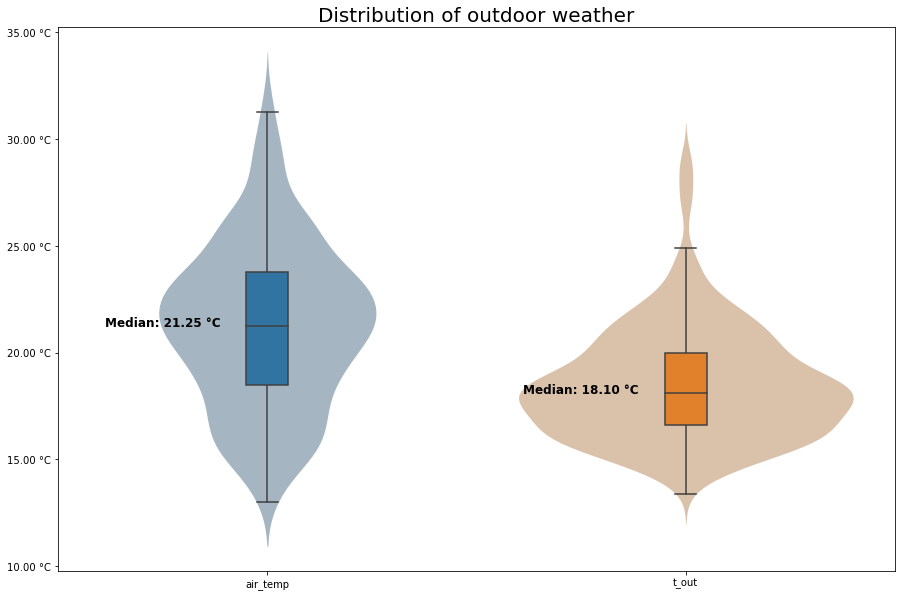

In [30]:
utils_plot.create_violin_plot(df_AO, ['air_temp', 't_out'], ' °C', 'Distribution of outdoor weather')

/Users/aoyuzou/Documents/Mac/ClassMaterial/ARCH299/SDH/functions/utils_plot.py:96: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([f'{y:.2f}{unit}' for y in y_ticks])


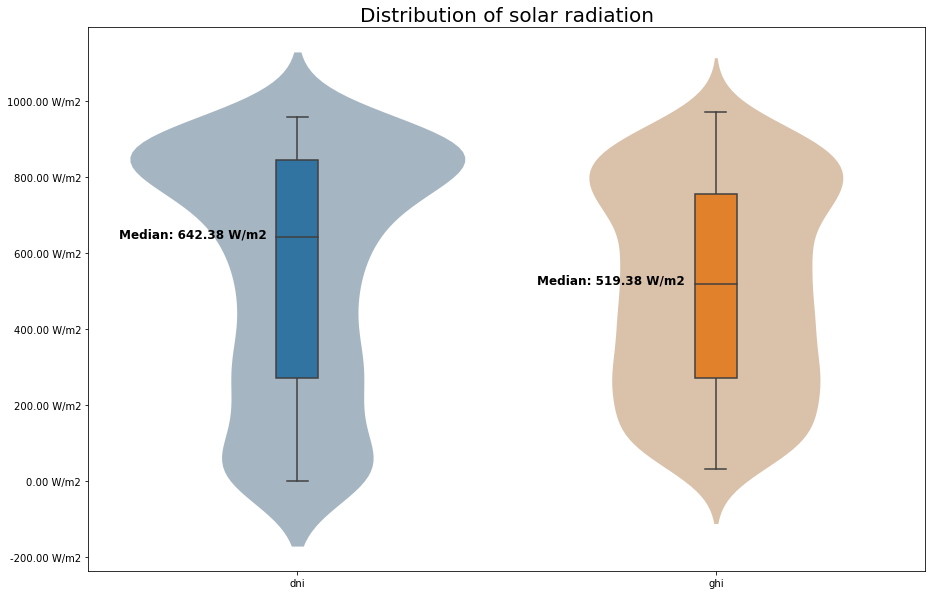

In [31]:
utils_plot.create_violin_plot(df_AO, ['dni', 'ghi'], ' W/m2', 'Distribution of solar radiation')

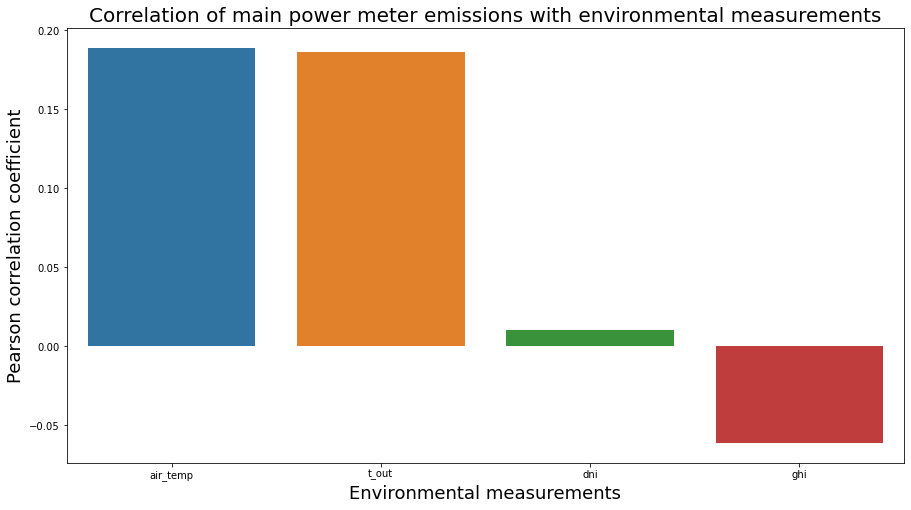

In [32]:
correlation_matrix = df_AO.corr()
correlation_with_emissions = correlation_matrix['SDH.SW.MSA.MAIN.PWR REAL 3 P'].drop('SDH.SW.MSA.MAIN.PWR REAL 3 P')  # Drop self-correlation
plt.figure(figsize=[15, 8])
sns.barplot(x=correlation_with_emissions.index, y=correlation_with_emissions.values)
plt.title('Correlation of main power meter emissions with environmental measurements', fontsize = 20)
plt.xlabel('Environmental measurements', fontsize = 18)
plt.ylabel('Pearson correlation coefficient', fontsize = 18)
plt.show()

Time window: Nov - March

In [44]:
df_NM = df_hourly_occ[(df_hourly_occ['datetime'].dt.month >= 11) | (df_hourly_occ['datetime'].dt.month <= 3)]
df_NM = df_NM[['SDH.SW.MSA.MAIN.PWR REAL 3 P', 'air_temp', 't_out', 'dni', 'ghi']]

/Users/aoyuzou/Documents/Mac/ClassMaterial/ARCH299/SDH/functions/utils_plot.py:96: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([f'{y:.2f}{unit}' for y in y_ticks])


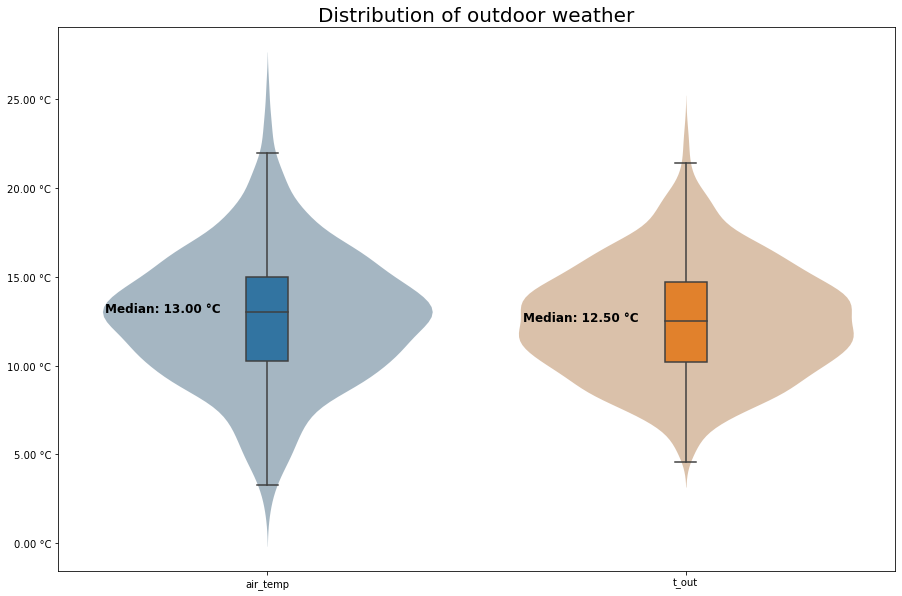

In [45]:
utils_plot.create_violin_plot(df_NM, ['air_temp', 't_out'], ' °C', 'Distribution of outdoor weather')

/Users/aoyuzou/Documents/Mac/ClassMaterial/ARCH299/SDH/functions/utils_plot.py:96: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([f'{y:.2f}{unit}' for y in y_ticks])


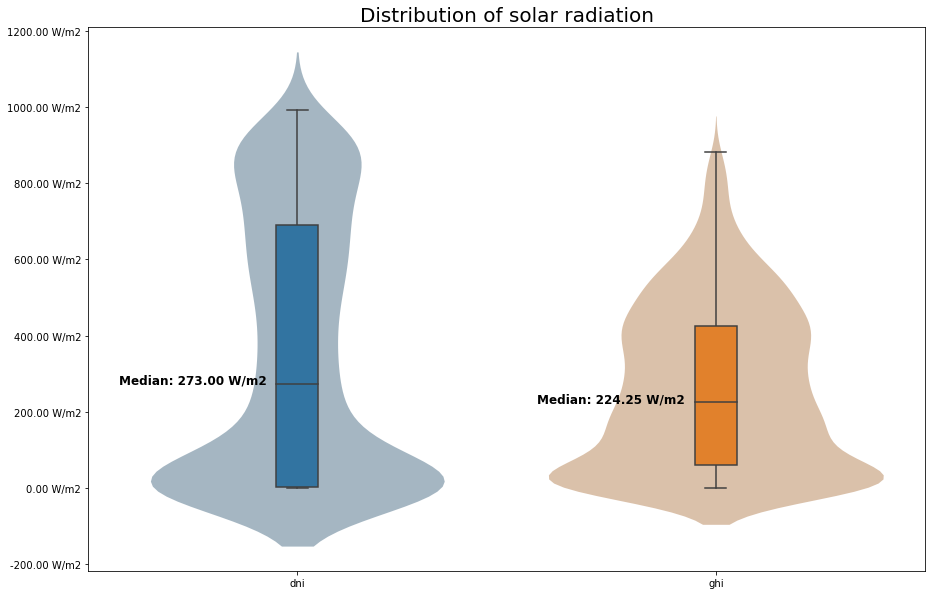

In [46]:
utils_plot.create_violin_plot(df_NM, ['dni', 'ghi'], ' W/m2', 'Distribution of solar radiation')

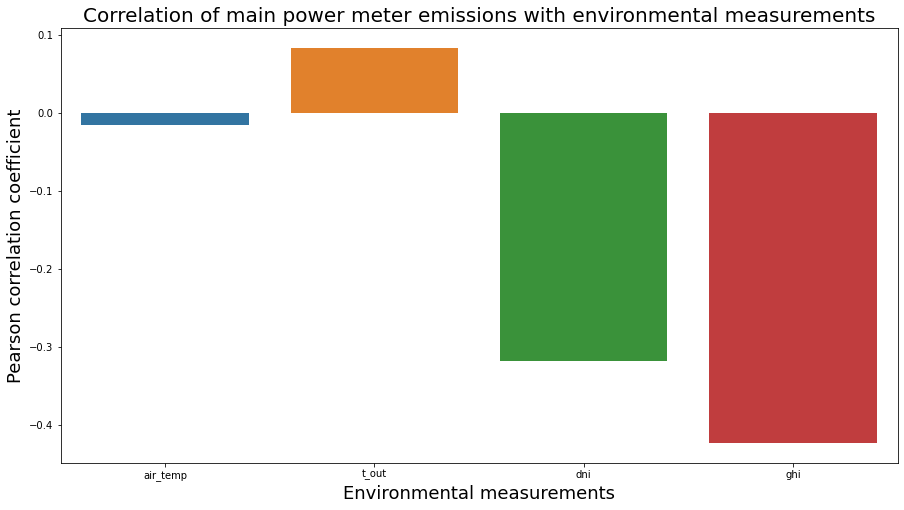

In [47]:
correlation_matrix = df_NM.corr()
correlation_with_emissions = correlation_matrix['SDH.SW.MSA.MAIN.PWR REAL 3 P'].drop('SDH.SW.MSA.MAIN.PWR REAL 3 P')  # Drop self-correlation
plt.figure(figsize=[15, 8])
sns.barplot(x=correlation_with_emissions.index, y=correlation_with_emissions.values)
plt.title('Correlation of main power meter emissions with environmental measurements', fontsize = 20)
plt.xlabel('Environmental measurements', fontsize = 18)
plt.ylabel('Pearson correlation coefficient', fontsize = 18)
plt.show()

Load shift analysis